In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

Data head:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.5

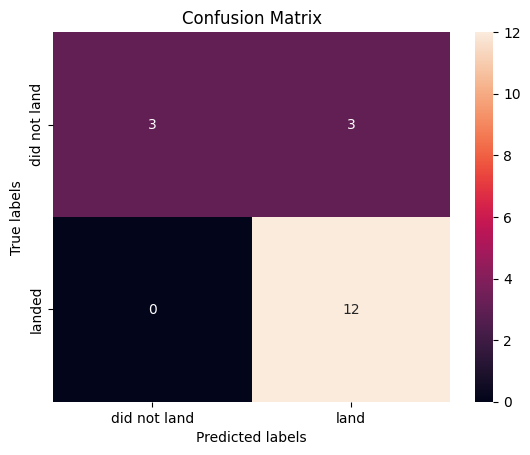


TASK 6: Support Vector Machine
Tuned hyperparameters (best parameters): {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Cross-validation accuracy: 0.8482
SVM Test accuracy: 0.8333


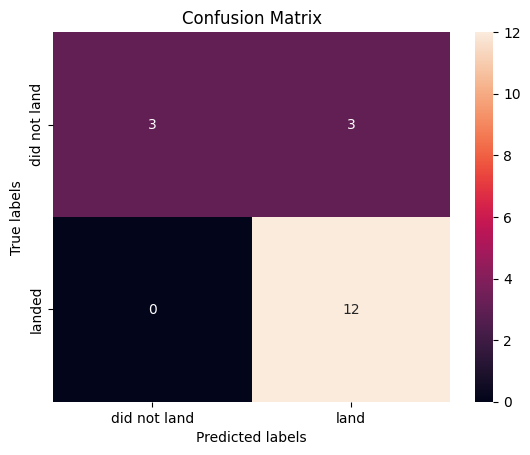


MODEL COMPARISON
Model                     CV Accuracy     Test Accuracy  
-------------------------------------------------------
Logistic Regression       0.8464          0.8333         
Support Vector Machine    0.8482          0.8333         


In [2]:
# Define confusion matrix plotting function
def plot_confusion_matrix(y,y_predict):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='d')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Load data
from js import fetch
import io

# Load dataset_part_2.csv for target variable
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)
print("Data head:")
print(data.head())

# Load dataset_part_3.csv for features
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)
print("\nFeatures head:")
print(X.head())

# TASK 1: Create NumPy array from 'Class' column
Y = data['Class'].to_numpy()
print(f"\nY shape: {Y.shape}")
print(f"Y unique values: {np.unique(Y)}")

# TASK 2: Standardize the data
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
print(f"\nX shape after standardization: {X.shape}")

# TASK 3: Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(f"\nTraining set size - X: {X_train.shape}, Y: {Y_train.shape}")
print(f"Test set size - X: {X_test.shape}, Y: {Y_test.shape}")

# TASK 4: Logistic Regression with GridSearchCV
print("\n" + "="*50)
print("TASK 4: Logistic Regression")
print("="*50)
parameters_lr = {'C': [0.01, 0.1, 1],
                 'penalty': ['l2'],
                 'solver': ['lbfgs']}

lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters_lr, cv=10)
logreg_cv.fit(X_train, Y_train)

print(f"Tuned hyperparameters (best parameters): {logreg_cv.best_params_}")
print(f"Cross-validation accuracy: {logreg_cv.best_score_:.4f}")

# TASK 5: Calculate test accuracy and plot confusion matrix
print("\n" + "="*50)
print("TASK 5: Test Evaluation")
print("="*50)
accuracy_test = logreg_cv.score(X_test, Y_test)
print(f"Test accuracy: {accuracy_test:.4f}")

yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

# TASK 6: SVM with GridSearchCV
print("\n" + "="*50)
print("TASK 6: Support Vector Machine")
print("="*50)
parameters_svm = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                  'C': np.logspace(-3, 3, 5),
                  'gamma': np.logspace(-3, 3, 5)}

svm = SVC()
svm_cv = GridSearchCV(svm, parameters_svm, cv=10)
svm_cv.fit(X_train, Y_train)

print(f"Tuned hyperparameters (best parameters): {svm_cv.best_params_}")
print(f"Cross-validation accuracy: {svm_cv.best_score_:.4f}")

# Test accuracy for SVM
svm_test_accuracy = svm_cv.score(X_test, Y_test)
print(f"SVM Test accuracy: {svm_test_accuracy:.4f}")

# Plot confusion matrix for SVM
yhat_svm = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_svm)

# Comparison of models
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
print(f"{'Model':<25} {'CV Accuracy':<15} {'Test Accuracy':<15}")
print("-"*55)
print(f"{'Logistic Regression':<25} {logreg_cv.best_score_:<15.4f} {accuracy_test:<15.4f}")
print(f"{'Support Vector Machine':<25} {svm_cv.best_score_:<15.4f} {svm_test_accuracy:<15.4f}")


TASK 7: SVM Test Evaluation
SVM Test accuracy: 0.8333


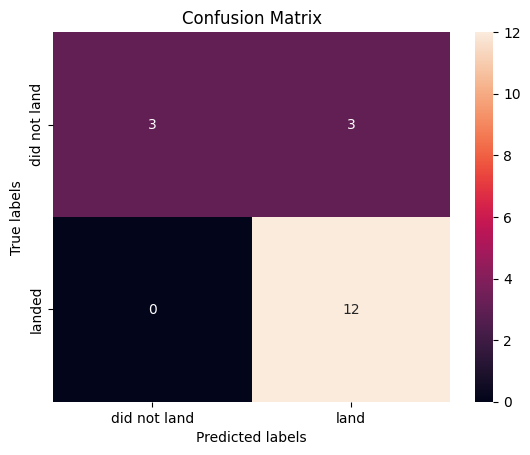


TASK 8: Decision Tree Classifier


/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_p

Tuned hyperparameters (best parameters):  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Cross-validation accuracy: 0.8750

TASK 9: Decision Tree Test Evaluation
Decision Tree Test accuracy: 0.8333


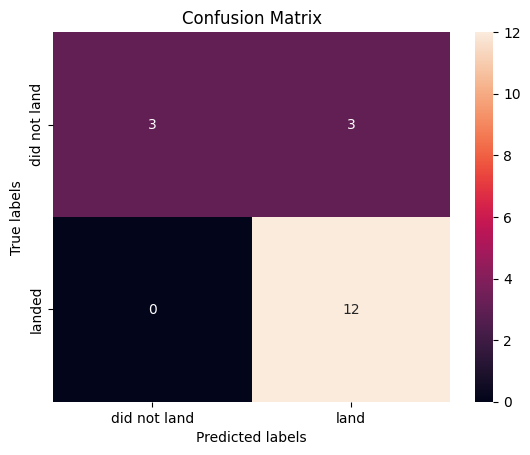


TASK 10: K-Nearest Neighbors Classifier
Tuned hyperparameters (best parameters):  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Cross-validation accuracy: 0.8482

TASK 11: KNN Test Evaluation
KNN Test accuracy: 0.8333


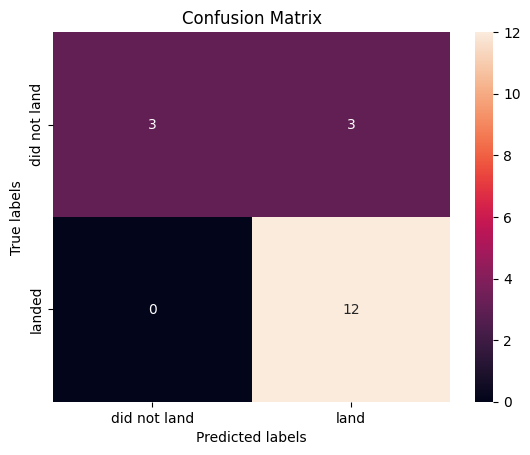


TASK 12: MODEL COMPARISON
Model                     CV Accuracy     Test Accuracy  
-------------------------------------------------------
Logistic Regression       0.8464          0.8333         
Support Vector Machine    0.8482          0.8333         
Decision Tree             0.8750          0.8333         
K-Nearest Neighbors       0.8482          0.8333         

SUMMARY
Best performing model: Logistic Regression
Test accuracy: 0.8333
Cross-validation accuracy: 0.8464


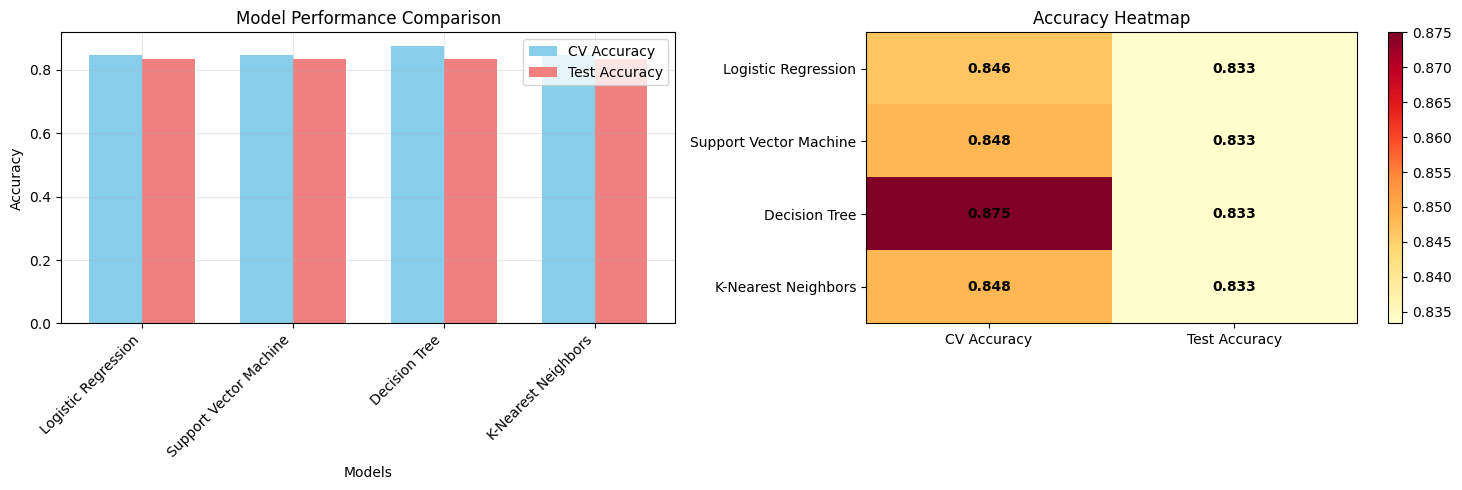


DETAILED ANALYSIS
1. Overfitting check (CV vs Test difference):
   Logistic Regression      : CV-Test diff = 0.0131 - GOOD GENERALIZATION
   Support Vector Machine   : CV-Test diff = 0.0149 - GOOD GENERALIZATION
   Decision Tree            : CV-Test diff = 0.0417 - GOOD GENERALIZATION
   K-Nearest Neighbors      : CV-Test diff = 0.0149 - GOOD GENERALIZATION

2. Model Ranking by Test Accuracy:
   1. Logistic Regression      : 0.8333
   2. Support Vector Machine   : 0.8333
   3. Decision Tree            : 0.8333
   4. K-Nearest Neighbors      : 0.8333


In [3]:
# TASK 7: Calculate accuracy for SVM on test data
print("\n" + "="*50)
print("TASK 7: SVM Test Evaluation")
print("="*50)
svm_test_accuracy = svm_cv.score(X_test, Y_test)
print(f"SVM Test accuracy: {svm_test_accuracy:.4f}")

# Plot confusion matrix for SVM
yhat_svm = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_svm)

# TASK 8: Decision Tree with GridSearchCV
print("\n" + "="*50)
print("TASK 8: Decision Tree Classifier")
print("="*50)
parameters_tree = {'criterion': ['gini', 'entropy'],
                   'splitter': ['best', 'random'],
                   'max_depth': [2*n for n in range(1, 10)],
                   'max_features': ['auto', 'sqrt'],
                   'min_samples_leaf': [1, 2, 4],
                   'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters_tree, cv=10)
tree_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters): ", tree_cv.best_params_)
print(f"Cross-validation accuracy: {tree_cv.best_score_:.4f}")

# TASK 9: Calculate accuracy for Decision Tree on test data
print("\n" + "="*50)
print("TASK 9: Decision Tree Test Evaluation")
print("="*50)
tree_test_accuracy = tree_cv.score(X_test, Y_test)
print(f"Decision Tree Test accuracy: {tree_test_accuracy:.4f}")

# Plot confusion matrix for Decision Tree
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_tree)

# TASK 10: K-Nearest Neighbors with GridSearchCV
print("\n" + "="*50)
print("TASK 10: K-Nearest Neighbors Classifier")
print("="*50)
parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'p': [1, 2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters_knn, cv=10)
knn_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters): ", knn_cv.best_params_)
print(f"Cross-validation accuracy: {knn_cv.best_score_:.4f}")

# TASK 11: Calculate accuracy for KNN on test data
print("\n" + "="*50)
print("TASK 11: KNN Test Evaluation")
print("="*50)
knn_test_accuracy = knn_cv.score(X_test, Y_test)
print(f"KNN Test accuracy: {knn_test_accuracy:.4f}")

# Plot confusion matrix for KNN
yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_knn)

# TASK 12: Compare all models
print("\n" + "="*50)
print("TASK 12: MODEL COMPARISON")
print("="*50)
print(f"{'Model':<25} {'CV Accuracy':<15} {'Test Accuracy':<15}")
print("-"*55)

# Collect all model results
model_results = [
    ('Logistic Regression', logreg_cv.best_score_, accuracy_test),
    ('Support Vector Machine', svm_cv.best_score_, svm_test_accuracy),
    ('Decision Tree', tree_cv.best_score_, tree_test_accuracy),
    ('K-Nearest Neighbors', knn_cv.best_score_, knn_test_accuracy)
]

# Print each model's results
for model_name, cv_acc, test_acc in model_results:
    print(f"{model_name:<25} {cv_acc:<15.4f} {test_acc:<15.4f}")

print("\n" + "="*50)
print("SUMMARY")
print("="*50)

# Find best model based on test accuracy
best_model_idx = np.argmax([test_acc for _, _, test_acc in model_results])
best_model_name, best_cv_acc, best_test_acc = model_results[best_model_idx]

print(f"Best performing model: {best_model_name}")
print(f"Test accuracy: {best_test_acc:.4f}")
print(f"Cross-validation accuracy: {best_cv_acc:.4f}")

# Visual comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot for CV accuracy
models = [m[0] for m in model_results]
cv_scores = [m[1] for m in model_results]
test_scores = [m[2] for m in model_results]

x = np.arange(len(models))
width = 0.35

ax1.bar(x - width/2, cv_scores, width, label='CV Accuracy', color='skyblue')
ax1.bar(x + width/2, test_scores, width, label='Test Accuracy', color='lightcoral')
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Performance Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Create a DataFrame for the results
results_df = pd.DataFrame({
    'Model': models,
    'CV_Accuracy': cv_scores,
    'Test_Accuracy': test_scores
})

# Heatmap for comparison
results_numeric = results_df[['CV_Accuracy', 'Test_Accuracy']].values
im = ax2.imshow(results_numeric, cmap='YlOrRd', aspect='auto')
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['CV Accuracy', 'Test Accuracy'])
ax2.set_yticks(range(len(models)))
ax2.set_yticklabels(models)
ax2.set_title('Accuracy Heatmap')

# Add text annotations
for i in range(len(models)):
    for j in range(2):
        text = ax2.text(j, i, f'{results_numeric[i, j]:.3f}',
                       ha="center", va="center", color="black", fontweight='bold')

plt.colorbar(im, ax=ax2)
plt.tight_layout()
plt.show()

# Detailed analysis
print("\n" + "="*50)
print("DETAILED ANALYSIS")
print("="*50)
print("1. Overfitting check (CV vs Test difference):")
for model_name, cv_acc, test_acc in model_results:
    diff = cv_acc - test_acc
    if diff > 0.05:
        status = "POSSIBLE OVERFITTING"
    elif diff < -0.02:
        status = "POSSIBLE UNDERFITTING"
    else:
        status = "GOOD GENERALIZATION"
    print(f"   {model_name:<25}: CV-Test diff = {diff:.4f} - {status}")

print("\n2. Model Ranking by Test Accuracy:")
sorted_results = sorted(model_results, key=lambda x: x[2], reverse=True)
for rank, (model_name, cv_acc, test_acc) in enumerate(sorted_results, 1):
    print(f"   {rank}. {model_name:<25}: {test_acc:.4f}")

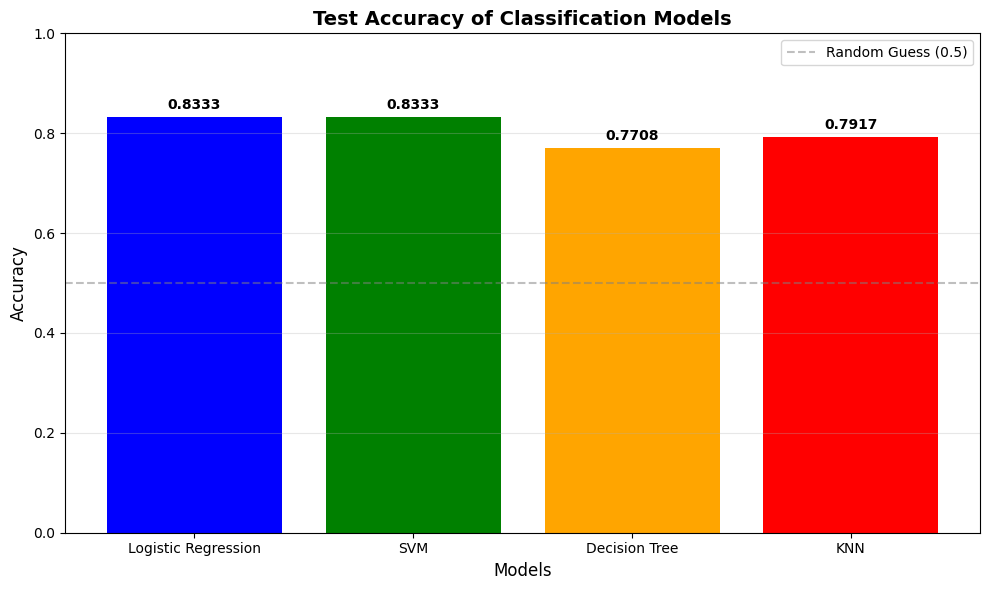

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for visualization
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
test_scores = [0.8333, 0.8333, 0.7708, 0.7917]  # Example test accuracies

# Create simple bar chart
plt.figure(figsize=(10, 6))

# Create bars
bars = plt.bar(model_names, test_scores, color=['blue', 'green', 'orange', 'red'])

# Add value labels on top of bars
for bar, score in zip(bars, test_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

# Customize chart
plt.title('Test Accuracy of Classification Models', fontsize=14, fontweight='bold')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.0)  # Set y-axis from 0 to 1 for accuracy
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Random Guess (0.5)')
plt.legend()

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

Best Model: Logistic Regression
Accuracy: 0.8333


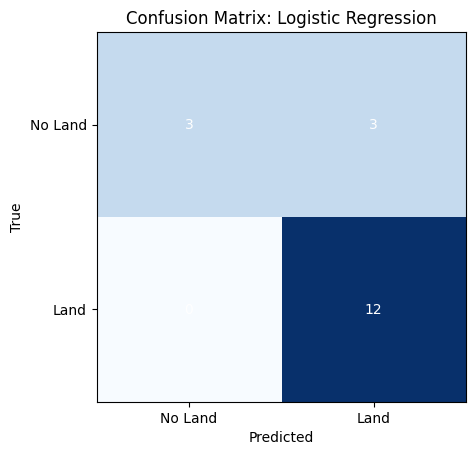

In [6]:
# Calculate test accuracies
accuracy_test = logreg_cv.score(X_test, Y_test)
svm_test_accuracy = svm_cv.score(X_test, Y_test)
tree_test_accuracy = tree_cv.score(X_test, Y_test)
knn_test_accuracy = knn_cv.score(X_test, Y_test)

# Find best model
test_accuracies = {
    'Logistic Regression': accuracy_test,
    'SVM': svm_test_accuracy,
    'Decision Tree': tree_test_accuracy,
    'KNN': knn_test_accuracy
}

best_model_name = max(test_accuracies, key=test_accuracies.get)
best_accuracy = test_accuracies[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Accuracy: {best_accuracy:.4f}")

# Show confusion matrix for best model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

if best_model_name == 'Logistic Regression':
    y_pred = logreg_cv.predict(X_test)
elif best_model_name == 'SVM':
    y_pred = svm_cv.predict(X_test)
elif best_model_name == 'Decision Tree':
    y_pred = tree_cv.predict(X_test)
else:
    y_pred = knn_cv.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['No Land', 'Land'])
ax.set_yticklabels(['No Land', 'Land'])
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
ax.set_title(f'Confusion Matrix: {best_model_name}')

plt.show()